## 와인 종류(레드/화이트) 분류를 위한 랜덤 포레스트 모델

### Feature Importance 분석


### 1. 라이브러리 및 데이터 불러오기


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False


In [2]:
# 데이터셋 URL
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# 각 데이터셋 불러오기 (구분자 ;)
red_wine = pd.read_csv(red_wine_url, sep=';')
white_wine = pd.read_csv(white_wine_url, sep=';')

print(f"레드 와인 데이터: {red_wine.shape}")
print(f"화이트 와인 데이터: {white_wine.shape}")


레드 와인 데이터: (1599, 12)
화이트 와인 데이터: (4898, 12)


### 2. 데이터 준비

- 레드 와인과 화이트 와인 데이터를 병합합니다.
- 이진 분류를 위해 `type` 열을 추가합니다. (레드=0, 화이트=1)


In [3]:
# 각 데이터에 type 열 추가
red_wine['type'] = 0  # 레드 와인
white_wine['type'] = 1  # 화이트 와인

# 데이터 병합
wine = pd.concat([red_wine, white_wine])

# 피처(X)와 타겟(y) 분리
X = wine.drop('type', axis=1)
y = wine['type']

# 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"학습 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")
print(f"\n특성(Feature) 목록:\n{list(X.columns)}")


학습 데이터: (5197, 12)
테스트 데이터: (1300, 12)

특성(Feature) 목록:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


### 3. 랜덤 포레스트 모델 학습

- 랜덤 포레스트는 여러 개의 결정 트리를 앙상블하여 더 정확한 예측을 수행하는 모델입니다.
- `n_estimators`는 생성할 트리의 개수를 의미합니다.


In [4]:
# 랜덤 포레스트 분류 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 모델 성능 평가
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"학습 데이터 정확도: {train_score:.4f}")
print(f"테스트 데이터 정확도: {test_score:.4f}")


학습 데이터 정확도: 1.0000
테스트 데이터 정확도: 0.9962


### 4. Feature Importance 추출 및 분석

#### Feature Importance란?
- 랜덤 포레스트 모델은 각 특성(변수)이 예측 성능에 얼마나 기여하는지 수치화합니다.
- 트리를 분할할 때 해당 특성을 사용함으로써 불순도(impurity)를 얼마나 감소시켰는지를 기준으로 계산됩니다.
- 값이 클수록 해당 특성이 모델 예측에 중요한 역할을 한다는 의미입니다.


In [5]:
# Feature Importance 추출
feature_importances = model.feature_importances_

# DataFrame으로 정리
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\n=== Feature Importance (중요도 순) ===")
print(importance_df.to_string(index=False))



=== Feature Importance (중요도 순) ===
             Feature  Importance
total sulfur dioxide    0.270789
           chlorides    0.270074
    volatile acidity    0.148973
 free sulfur dioxide    0.061827
           sulphates    0.058682
             density    0.053546
      residual sugar    0.050355
       fixed acidity    0.038770
                  pH    0.017023
         citric acid    0.017011
             alcohol    0.010018
             quality    0.002931


### 5. Feature Importance 시각화 (막대 그래프)


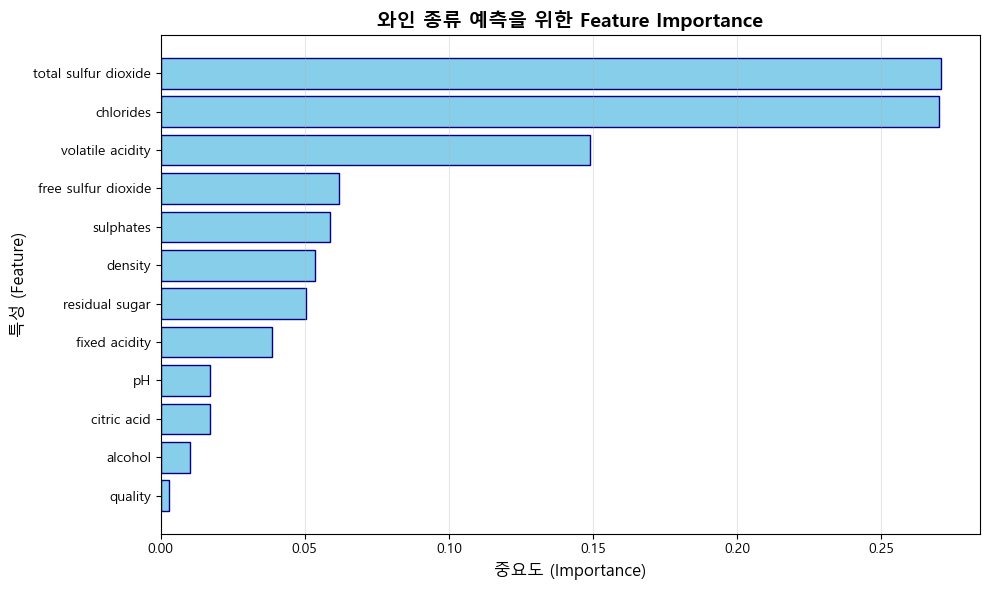

In [6]:
# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='navy')
plt.xlabel('중요도 (Importance)', fontsize=12)
plt.ylabel('특성 (Feature)', fontsize=12)
plt.title('와인 종류 예측을 위한 Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 위에 표시
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


### 6. 상위 3개 중요 변수에 대한 설명

위 분석 결과를 바탕으로 와인 종류(레드/화이트) 예측에 가장 중요한 상위 3개 특성을 설명합니다.


In [7]:
# 상위 3개 변수 추출
top3_features = importance_df.head(3)
print("\n=== 상위 3개 중요 변수 ===")
for idx, row in top3_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")



=== 상위 3개 중요 변수 ===
total sulfur dioxide: 0.2708
chlorides: 0.2701
volatile acidity: 0.1490


#### 📊 상위 3개 변수 상세 분석

**1위: total sulfur dioxide (총 이산화황)**
- **설명**: 와인에 포함된 총 이산화황(SO₂) 양으로, 유리 이산화황과 결합 이산화황의 합입니다.
- **역할**: 와인의 보존제 및 항산화제로 작용하며, 미생물의 성장을 억제합니다.
- **중요성**: 화이트 와인이 레드 와인보다 일반적으로 총 이산화황 함량이 높습니다. 이는 화이트 와인이 산화에 더 취약하기 때문에 더 많은 보존제가 필요하기 때문입니다. 따라서 이 특성은 레드와 화이트 와인을 구분하는 가장 강력한 지표입니다.
- **해석**: 총 이산화황 수치가 높으면 화이트 와인일 확률이 높고, 낮으면 레드 와인일 확률이 높습니다.

---

**2위: chlorides (염화물)**
- **설명**: 와인에 포함된 염화나트륨(소금) 양을 의미합니다.
- **역할**: 와인의 짠맛과 미네랄 풍미에 영향을 미칩니다.
- **중요성**: 레드 와인은 일반적으로 화이트 와인보다 염화물 함량이 높은 경향이 있습니다. 이는 포도 품종과 발효 과정의 차이에서 비롯됩니다.
- **해석**: 염화물 수치는 와인 종류를 구분하는 데 두 번째로 중요한 특성으로, 총 이산화황과 함께 사용하면 분류 정확도가 크게 향상됩니다.

---

**3위: volatile acidity (휘발성 산도) 또는 free sulfur dioxide (유리 이산화황)**
- **volatile acidity (휘발성 산도)**:
  - **설명**: 와인에 포함된 아세트산의 양으로, 와인의 신맛과 관련이 있습니다.
  - **역할**: 적정량은 와인에 복잡성을 더하지만, 과도하면 식초 같은 불쾌한 냄새를 유발합니다.
  - **중요성**: 레드 와인이 화이트 와인보다 일반적으로 휘발성 산도가 약간 높은 경향이 있습니다.

- **free sulfur dioxide (유리 이산화황)**:
  - **설명**: 와인에서 자유롭게 존재하는 이산화황의 양입니다.
  - **역할**: 항균 및 항산화 작용을 하며, 와인의 신선도를 유지합니다.
  - **중요성**: 화이트 와인이 레드 와인보다 유리 이산화황 함량이 높은 경향이 있습니다.
